<a href="https://colab.research.google.com/github/casualcomputer/llm_google_colab/blob/main/setup_ollama_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running Ollama on Google Colab (LLaMA3 model demo)

- Ollama is an advanced language model platform designed to simplify the deployment and management of NLP applications. It's crucial for developers and researchers seeking to leverage cutting-edge NLP technologies with ease and efficiency. This tutorial will guide you through running LLaMA3 on Ollama within a Google Colab environment, covering setup, integration, and execution steps for making simple queries.

- The scripts below run in the colab's CPU environment, and most likely work when Nvidia's CUDA GPU is available (if you select the runtime that leverages CUDA GPU). Detailed upadates will be made after more testing.

In [1]:
# Install ollama: The Ollama API is now available at 127.0.0.1:11434
! curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [4]:
# serve ollama locally
import subprocess
process = subprocess.Popen("ollama serve", shell=True)
# credit: https://stackoverflow.com/questions/78437376/run-ollama-run-llama3-in-colab-raise-err-error-could-not-connect-to-ollama

# download the llama3 model
!ollama pull llama3 #download llama3 model

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest 
pulling 6a0746a1ec1a... 100% ▕▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕▏  12 KB                         
pulling 8ab4849b038c... 100% ▕▏  254 B                         
pulling 577073ffcc6c... 100% ▕▏  110 B                         
pulling 3f8eb4da87fa... 100% ▕▏  485 B                         
verifying sha256 digest 
writing manifest 
success 


In [6]:
# !ollama run llama3 #run ollama model # type out your questions in the shell

## Invocation d'un LLM en mode textuel

Largement inspiré par [OllamaLLM](https://python.langchain.com/docs/integrations/llms/ollama/), lequel amène à [ollama.ipynb](https://colab.research.google.com/github/langchain-ai/langchain/blob/master/docs/docs/integrations/llms/ollama.ipynb).

In [7]:
# install package
%pip install -U langchain-ollama

In [16]:
subprocess.Popen("ollama serve", shell=True)

<Popen: returncode: None args: 'ollama serve'>

In [17]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM

template = """Question: {question}

Answer: Let's think step by step."""

prompt = ChatPromptTemplate.from_template(template)

model = OllamaLLM(model="llama3")

chain = prompt | model

chain.invoke({"question": "What is LangChain?"})

'A great question!\n\nLangChain is a type of AI model that\'s designed to generate coherent and context-specific text based on a given prompt or input. It\'s a type of language model, but with some key differences that set it apart from other popular models like BERT (Bidirectional Encoder Representations from Transformers) or transformer-based models.\n\nTo dive deeper, let me break down the concept into smaller parts:\n\n1. **Chain**: The "chain" part refers to LangChain\'s ability to generate text in a sequence, one piece at a time. It builds upon its previous output to create a coherent and natural-sounding narrative.\n2. **Language**: As you might expect, LangChain is all about processing and generating human language. It can take in written or spoken input and produce corresponding text.\n\nSo, when we put it together, LangChain can be thought of as a model that creates a chain of connected text based on the input prompt. This allows it to generate longer, more context-specific r

### Utilisation d'un LLM pour l'analyse d'image

In [18]:
!ollama pull bakllava

pulling manifest ⠋ pulling manifest ⠹ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠦ pulling manifest ⠦ pulling manifest 
pulling deb26e54cceb...   0% ▕▏    0 B/4.1 GB                  pulling manifest 
pulling deb26e54cceb...   0% ▕▏    0 B/4.1 GB                  pulling manifest 
pulling deb26e54cceb...   0% ▕▏    0 B/4.1 GB                  pulling manifest 
pulling deb26e54cceb...   0% ▕▏ 1.1 MB/4.1 GB                  pulling manifest 
pulling deb26e54cceb...   1% ▕▏  32 MB/4.1 GB                  pulling manifest 
pulling deb26e54cceb...   2% ▕▏  88 MB/4.1 GB                  pulling manifest 
pulling deb26e54cceb...   3% ▕▏ 116 MB/4.1 GB                  pulling manifest 
pulling deb26e54cceb...   3% ▕▏ 142 MB/4.1 GB                  pulling manifest 
pulling deb26e54cceb...   4% ▕▏ 171 MB/4.1 GB                  pulling manifest 
pulling deb26e54cceb...   5% ▕▏ 188 MB/4.1 GB                  pulling manifest 
pulling deb26e54cceb...   5% ▕▏ 219 MB/

In [20]:
## Download the image using curl
!curl -o ollama_example_img.jpg https://uqam-lomagnin.github.io/INF8790/lectures/08_llm/ollama_example_img.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 39028  100 39028    0     0   176k      0 --:--:-- --:--:-- --:--:--  176k



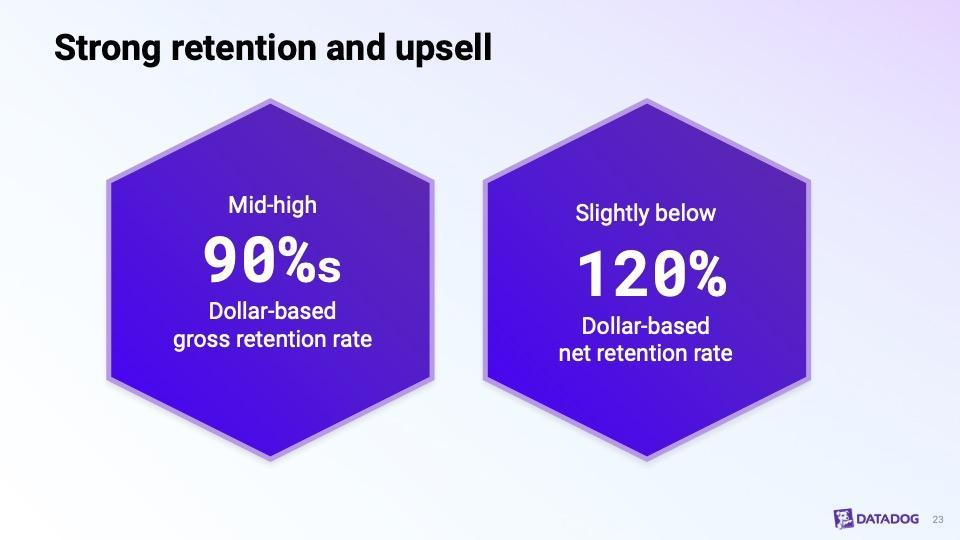

In [21]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "./ollama_example_img.jpg"
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [22]:
from langchain_ollama import OllamaLLM

llm = OllamaLLM(model="bakllava")

llm_with_image_context = llm.bind(images=[image_b64])
llm_with_image_context.invoke("What is the dollar based gross retention rate:")

'90%'